# Learning About SVD

This notebook is a step by step journey to understanding the Singular Value Decomposition (SVD)

In [1]:
# import numpy for SVD function
import numpy
# import matplotlib.pyplot for visualising arrays
import matplotlib.pyplot as plt

## A Simple Matrix

In [2]:
# create a really simple matrix
A = numpy.array([[-1,1], [1,1]])
# and show it
print("A = \n", A)

A = 
 [[-1  1]
 [ 1  1]]


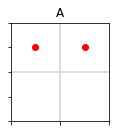

In [3]:
# plot the array
p = plt.subplot(131)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("A")
p.plot(A[0,],A[1,],'ro')

plt.show()

## Now Take the SVD

In [4]:
# break it down into an SVD
U, s, VT = numpy.linalg.svd(A, full_matrices=False)
S = numpy.diag(s)

In [5]:
# what are U, S and V
print("U =\n", U, "\n")
print("S =\n", S, "\n")
print("V^T =\n", VT, "\n")

U =
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 

S =
 [[ 1.41421356  0.        ]
 [ 0.          1.41421356]] 

V^T =
 [[ 1.  0.]
 [ 0.  1.]] 



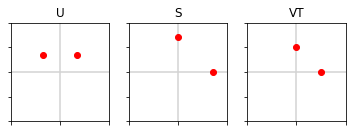

In [6]:
for px in [(131,U, "U"), (132,S, "S"), (133,VT, "VT")]:
    subplot = px[0]
    matrix = px[1]
    matrix_name = px[2]
    p = plt.subplot(subplot)
    
    p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
    p.set_yticklabels([]); p.set_xticklabels([])

    p.set_title(matrix_name)
    p.plot(matrix[0,],matrix[1,],'ro')
    pass

plt.show()

## Check U, S and V^T Do Actually Reconstruct A

In [7]:
# rebuild A2 from U.S.V
A2 = numpy.dot(U,numpy.dot(S,VT))
print("A2 = \n", A2)

A2 = 
 [[-1.  1.]
 [ 1.  1.]]


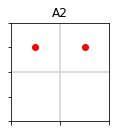

In [8]:
# plot the reconstructed A2
p = plt.subplot(131)
p.axis('scaled'); p.axis([-2, 2, -2, 2]); p.axhline(y=0, color='lightgrey'); p.axvline(x=0, color='lightgrey')
p.set_yticklabels([]); p.set_xticklabels([])

p.set_title("A2")
p.plot(A2[0,],A2[1,],'ro')

plt.show()

Yes, that worked .. the reconstructed A2 is the same as the original A